In [3]:
import numpy as np
from matplotlib import pyplot as plt
from tifffile import imread
from skimage.filters import threshold_multiotsu
import os
import porespy as ps
from tifffile import imwrite
from hydra.experimental import compose, initialize
from omegaconf import OmegaConf
import torch
from matplotlib import pyplot as plt
from tifffile import imread
import numpy as np
import pickle
from hydra.experimental import compose, initialize
import os
import torch
from lpu3dnet.frame import vqgan
from lpu3dnet.frame import transformer

root_dir = 'data_ref_hard'

In [4]:
ct_idx = 1
vol_dim = 3
with open(f'{root_dir}/sample_{ct_idx}/phys_results_{vol_dim}.pickle', 'rb') as file:
    # Deserialize the data from the file and assign it to a variable
    sim_results = pickle.load(file)

#### Porosity check

In [20]:
for i in range(4):
    phys_generate = sim_results[i]['generate']

    print(30*"--")
    print('original',sim_results[i]['original']['porosity'])
    

    for phys_emsemble in phys_generate:
        print(phys_emsemble['porosity'])

------------------------------------------------------------
original 0.1807308903446904
0.18459758052119501
0.20276670102719907
0.18863381279839408
0.1906892281991464
------------------------------------------------------------
original 0.18231074015299478
0.1796274538393374
0.18917549981011283
0.191271322744864
0.19739631370261865
------------------------------------------------------------
original 0.18845226146556712
0.1703431871202257
0.17514687997323494
0.18748149165400751
0.18578889634874132
------------------------------------------------------------
original 0.20273731372974538
0.1864225599500868
0.2059620044849537
0.1945521036783854
0.18192573829933448


In [22]:
sim_results.keys()

dict_keys(['compare', 0, 1, 2, 3])

#### Perm check

In [25]:
k_gen, k_real, k_compare = [], [], []

for i in range(4):
    phys_generate = sim_results[i]['generate']
    phys_real = sim_results[i]['original']
    for phys_emsemble in phys_generate:
        k_gen.append(phys_emsemble['kabs'])
        k_real.append(phys_real['kabs'])


# comparison

compare_results = sim_results['compare']

for compare_phys in compare_results:
    k_compare.append(compare_phys['kabs'])
    

(0.0, 500.0)

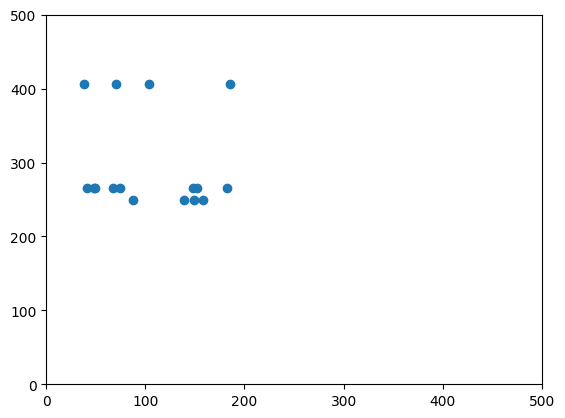

In [34]:
plt.scatter(k_gen,k_real)
plt.xlim([0,500])
plt.ylim([0,500])

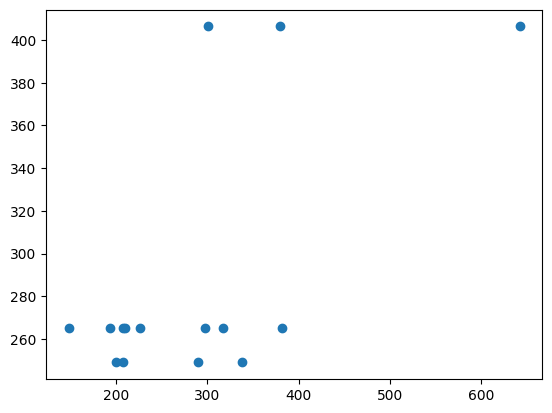

In [38]:
plt.scatter(k_compare,k_real[:-1])

#### Rekatuve perm checkout

/tmp/ipykernel_114635/2832434253.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g." (-> color='g'). The keyword argument will take precedence.
  plt.plot(compare['sw'], compare['kr_air'], 'g.', color='gray', markersize=5, label='compare')


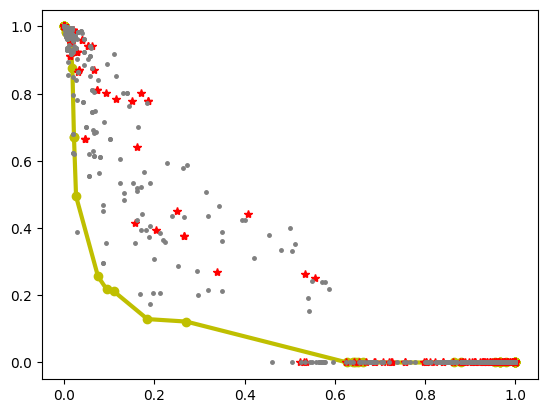

In [56]:
# plot original kr
sample_idx = 0
kr_results_real = sim_results[sample_idx]['original']
kr_results_pred = sim_results[sample_idx]['generate']

f = plt.figure()
# Using 'yo-' for yellow dots with a line, making the line thicker for visibility
plt.plot(kr_results_real['sw'], kr_results_real['kr_air'], 'yo-', linewidth=3, label='real')

for ensemble in kr_results_pred:
    # Using 'r*-' for red stars with a line, specifying a smaller line width
    plt.plot(ensemble['sw'], ensemble['kr_air'], 'r*', linewidth=2, label='pred')

# Plot comparison
compare_phys = sim_results['compare']
for compare in compare_phys:
    # Using 'g.' for gray dots, no connecting line, and specifying marker size for smaller appearance
    plt.plot(compare['sw'], compare['kr_air'], 'g.', color='gray', markersize=5, label='compare')

plt.show()




/tmp/ipykernel_114635/1743798520.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g." (-> color='g'). The keyword argument will take precedence.
  plt.plot(compare['sw'], compare['kr_air'], 'g.', color='gray', markersize=5, label='compare')


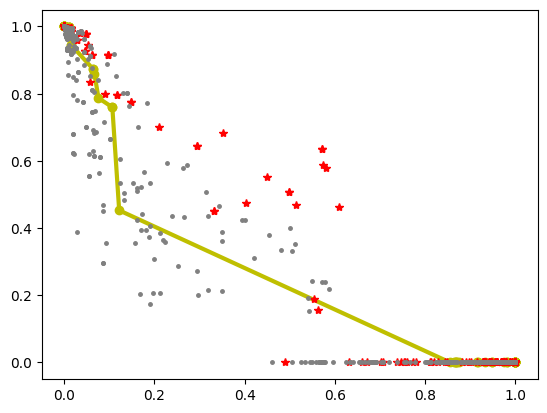

In [57]:
sample_idx = 1
kr_results_real = sim_results[sample_idx]['original']
kr_results_pred = sim_results[sample_idx]['generate']

f = plt.figure()
# Using 'yo-' for yellow dots with a line, making the line thicker for visibility
plt.plot(kr_results_real['sw'], kr_results_real['kr_air'], 'yo-', linewidth=3, label='real')

for ensemble in kr_results_pred:
    # Using 'r*-' for red stars with a line, specifying a smaller line width
    plt.plot(ensemble['sw'], ensemble['kr_air'], 'r*', linewidth=2, label='pred')

# Plot comparison
compare_phys = sim_results['compare']
for compare in compare_phys:
    # Using 'g.' for gray dots, no connecting line, and specifying marker size for smaller appearance
    plt.plot(compare['sw'], compare['kr_air'], 'g.', color='gray', markersize=5, label='compare')

plt.show()

/tmp/ipykernel_114635/217729424.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g." (-> color='g'). The keyword argument will take precedence.
  plt.plot(compare['sw'], compare['kr_air'], 'g.', color='gray', markersize=5, label='compare')


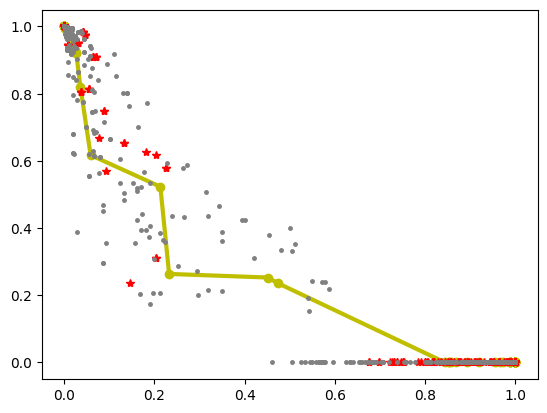

In [58]:
sample_idx = 2
kr_results_real = sim_results[sample_idx]['original']
kr_results_pred = sim_results[sample_idx]['generate']

f = plt.figure()
# Using 'yo-' for yellow dots with a line, making the line thicker for visibility
plt.plot(kr_results_real['sw'], kr_results_real['kr_air'], 'yo-', linewidth=3, label='real')

for ensemble in kr_results_pred:
    # Using 'r*-' for red stars with a line, specifying a smaller line width
    plt.plot(ensemble['sw'], ensemble['kr_air'], 'r*', linewidth=2, label='pred')

# Plot comparison
compare_phys = sim_results['compare']
for compare in compare_phys:
    # Using 'g.' for gray dots, no connecting line, and specifying marker size for smaller appearance
    plt.plot(compare['sw'], compare['kr_air'], 'g.', color='gray', markersize=5, label='compare')

plt.show()

/tmp/ipykernel_114635/1985046930.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g." (-> color='g'). The keyword argument will take precedence.
  plt.plot(compare['sw'], compare['kr_air'], 'g.', color='gray', markersize=5, label='compare')


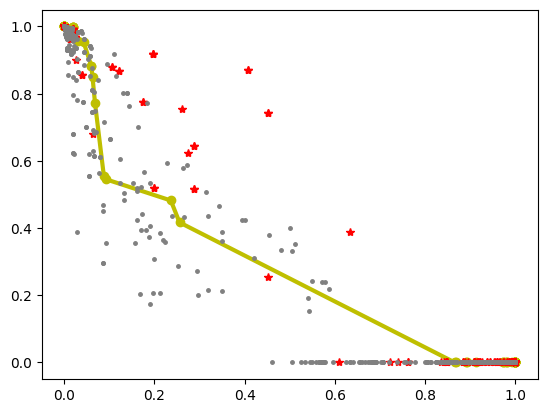

In [59]:
sample_idx = 3
kr_results_real = sim_results[sample_idx]['original']
kr_results_pred = sim_results[sample_idx]['generate']

f = plt.figure()
# Using 'yo-' for yellow dots with a line, making the line thicker for visibility
plt.plot(kr_results_real['sw'], kr_results_real['kr_air'], 'yo-', linewidth=3, label='real')

for ensemble in kr_results_pred:
    # Using 'r*-' for red stars with a line, specifying a smaller line width
    plt.plot(ensemble['sw'], ensemble['kr_air'], 'r*', linewidth=2, label='pred')

# Plot comparison
compare_phys = sim_results['compare']
for compare in compare_phys:
    # Using 'g.' for gray dots, no connecting line, and specifying marker size for smaller appearance
    plt.plot(compare['sw'], compare['kr_air'], 'g.', color='gray', markersize=5, label='compare')

plt.show()